In [1]:
import pandas as pd
import numpy as np

In [2]:
train_X = pd.read_excel('train_X.xlsx', index_col=0)
train_Y = pd.read_excel('train_Y.xlsx', index_col=0)
test_X  = pd.read_excel('test_X.xlsx',  index_col=0)
test_Y  = pd.read_excel('test_Y.xlsx',  index_col=0)

In [3]:
colu = list(train_X.columns)

In [4]:
num = [5,0,3,4,51,1,2,49,47,55,53,10,12,9,8,11,7,18,48,6]

In [5]:
train_X_20 = pd.DataFrame()
test_X_20 = pd.DataFrame()
for i in num[0:20]:
    train_X_20 = pd.concat((train_X_20, train_X[colu[i]]),axis=1)
    test_X_20 = pd.concat((test_X_20, test_X[colu[i]]),axis=1)

In [6]:
train_X_15 = pd.DataFrame()
test_X_15 = pd.DataFrame()
for i in num[0:5]:
    train_X_15 = pd.concat((train_X_15, train_X[colu[i]]),axis=1)
    test_X_15 = pd.concat((test_X_15, test_X[colu[i]]),axis=1)

In [7]:
train_X_10 = pd.DataFrame()
test_X_10 = pd.DataFrame()
for i in num[0:10]:
    train_X_10 = pd.concat((train_X_10, train_X[colu[i]]),axis=1)
    test_X_10 = pd.concat((test_X_10, test_X[colu[i]]),axis=1)

In [8]:
train_X_5 = pd.DataFrame()
test_X_5 = pd.DataFrame()
for i in num[0:5]:
    train_X_5 = pd.concat((train_X_5, train_X[colu[i]]),axis=1)
    test_X_5 = pd.concat((test_X_5, test_X[colu[i]]),axis=1)

In [9]:
print(train_X_20.shape)
print(test_X_20.shape)
print(train_X_15.shape)
print(test_X_15.shape)
print(train_X_10.shape)
print(test_X_10.shape)
print(train_X_5.shape)
print(test_X_5.shape)

(141089, 20)
(36384, 20)
(141089, 5)
(36384, 5)
(141089, 10)
(36384, 10)
(141089, 5)
(36384, 5)


## 평가(머신러닝)

In [10]:
from pandas import Series
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#### XGBOOSTING

In [11]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap
import numpy as np
import matplotlib.pylab as pl
from sklearn.datasets import dump_svmlight_file

# print the JS visualization code to the notebook
shap.initjs()

In [12]:
for nn, train_X, test_X, depth in [(20, train_X_20, test_X_20, 12), (15, train_X_15, test_X_15, 11), (10, train_X_10, test_X_10, 7), (5, train_X_5, test_X_5, 5)]:
    print('*****************************',nn,'*****************************')
    dump_svmlight_file(train_X, train_Y['Final'], 'dtrain.svm', zero_based=True)
    dump_svmlight_file(test_X, test_Y['Final'], 'dtest.svm', zero_based=True)
    d_train = xgb.DMatrix('dtrain.svm')
    d_test  = xgb.DMatrix('dtest.svm')

    param = {'max_depth': depth, 'eta': 0.3, 'verbosity': 0, 'objective':'multi:softprob', 'num_class': 2} #'objective': 'multi:softprob'
    model1 = xgb.train(param, d_train, 5000, evals = [(d_test, "test")], early_stopping_rounds=50)
    Y_preds1 = model1.predict(d_test)
    best_preds = np.asarray([np.argmax(line) for line in Y_preds1])
    
    print('ROC:',       str(  roc_auc_score(test_Y, best_preds)))
    print('Accuracy:',  str( accuracy_score(test_Y, best_preds)))

    print('Recall:',    str(   recall_score(test_Y, best_preds)))
    print('Precision:', str(precision_score(test_Y, best_preds)))
    print('** F1 score **:', str(  f1_score(test_Y, best_preds)))

    print('clasification report:\n', str(classification_report(test_Y, best_preds)))
    print('confusion matrix:\n',    str(     confusion_matrix(test_Y, best_preds)))

***************************** 20 *****************************
[0]	test-mlogloss:0.44881
[1]	test-mlogloss:0.31075
[2]	test-mlogloss:0.22397
[3]	test-mlogloss:0.16526
[4]	test-mlogloss:0.12404
[5]	test-mlogloss:0.09434
[6]	test-mlogloss:0.07273
[7]	test-mlogloss:0.05663
[8]	test-mlogloss:0.04457
[9]	test-mlogloss:0.03548
[10]	test-mlogloss:0.02886
[11]	test-mlogloss:0.02341
[12]	test-mlogloss:0.01956
[13]	test-mlogloss:0.01648
[14]	test-mlogloss:0.01434
[15]	test-mlogloss:0.01268
[16]	test-mlogloss:0.01154
[17]	test-mlogloss:0.01056
[18]	test-mlogloss:0.00967
[19]	test-mlogloss:0.00897
[20]	test-mlogloss:0.00844
[21]	test-mlogloss:0.00816
[22]	test-mlogloss:0.00790
[23]	test-mlogloss:0.00752
[24]	test-mlogloss:0.00729
[25]	test-mlogloss:0.00724
[26]	test-mlogloss:0.00701
[27]	test-mlogloss:0.00692
[28]	test-mlogloss:0.00677
[29]	test-mlogloss:0.00661
[30]	test-mlogloss:0.00654
[31]	test-mlogloss:0.00644
[32]	test-mlogloss:0.00646
[33]	test-mlogloss:0.00635
[34]	test-mlogloss:0.00635
[3

[30]	test-mlogloss:0.01469
[31]	test-mlogloss:0.01400
[32]	test-mlogloss:0.01326
[33]	test-mlogloss:0.01291
[34]	test-mlogloss:0.01248
[35]	test-mlogloss:0.01237
[36]	test-mlogloss:0.01176
[37]	test-mlogloss:0.01132
[38]	test-mlogloss:0.01083
[39]	test-mlogloss:0.01044
[40]	test-mlogloss:0.01017
[41]	test-mlogloss:0.00989
[42]	test-mlogloss:0.00954
[43]	test-mlogloss:0.00915
[44]	test-mlogloss:0.00900
[45]	test-mlogloss:0.00864
[46]	test-mlogloss:0.00834
[47]	test-mlogloss:0.00810
[48]	test-mlogloss:0.00807
[49]	test-mlogloss:0.00783
[50]	test-mlogloss:0.00775
[51]	test-mlogloss:0.00759
[52]	test-mlogloss:0.00747
[53]	test-mlogloss:0.00720
[54]	test-mlogloss:0.00693
[55]	test-mlogloss:0.00679
[56]	test-mlogloss:0.00666
[57]	test-mlogloss:0.00658
[58]	test-mlogloss:0.00650
[59]	test-mlogloss:0.00638
[60]	test-mlogloss:0.00631
[61]	test-mlogloss:0.00620
[62]	test-mlogloss:0.00618
[63]	test-mlogloss:0.00609
[64]	test-mlogloss:0.00600
[65]	test-mlogloss:0.00594
[66]	test-mlogloss:0.00593
[

[144]	test-mlogloss:0.01027
[145]	test-mlogloss:0.01025
[146]	test-mlogloss:0.01017
[147]	test-mlogloss:0.01014
[148]	test-mlogloss:0.01012
[149]	test-mlogloss:0.01011
[150]	test-mlogloss:0.01009
[151]	test-mlogloss:0.01006
[152]	test-mlogloss:0.01004
[153]	test-mlogloss:0.01003
[154]	test-mlogloss:0.01002
[155]	test-mlogloss:0.01000
[156]	test-mlogloss:0.00998
[157]	test-mlogloss:0.00999
[158]	test-mlogloss:0.00997
[159]	test-mlogloss:0.00993
[160]	test-mlogloss:0.00991
[161]	test-mlogloss:0.00991
[162]	test-mlogloss:0.00988
[163]	test-mlogloss:0.00986
[164]	test-mlogloss:0.00985
[165]	test-mlogloss:0.00983
[166]	test-mlogloss:0.00983
[167]	test-mlogloss:0.00978
[168]	test-mlogloss:0.00977
[169]	test-mlogloss:0.00970
[170]	test-mlogloss:0.00968
[171]	test-mlogloss:0.00969
[172]	test-mlogloss:0.00967
[173]	test-mlogloss:0.00967
[174]	test-mlogloss:0.00967
[175]	test-mlogloss:0.00960
[176]	test-mlogloss:0.00959
[177]	test-mlogloss:0.00952
[178]	test-mlogloss:0.00951
[179]	test-mlogloss:

In [17]:
import shap
from shap import TreeExplainer

In [18]:
X = pd.concat([train_X,test_X])

In [19]:
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(X)

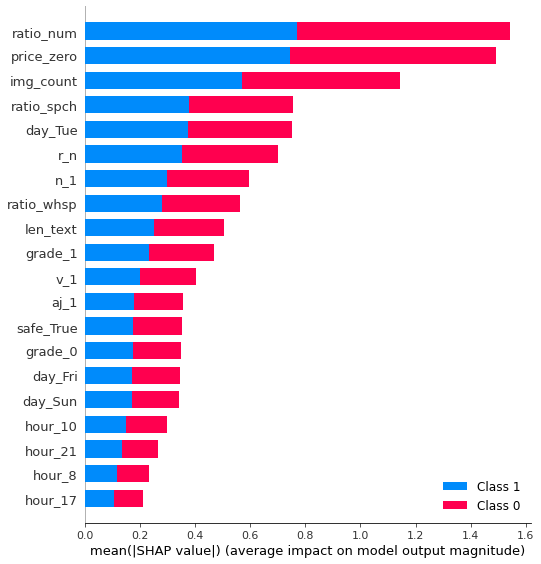

In [20]:
shap.summary_plot(shap_values, X)

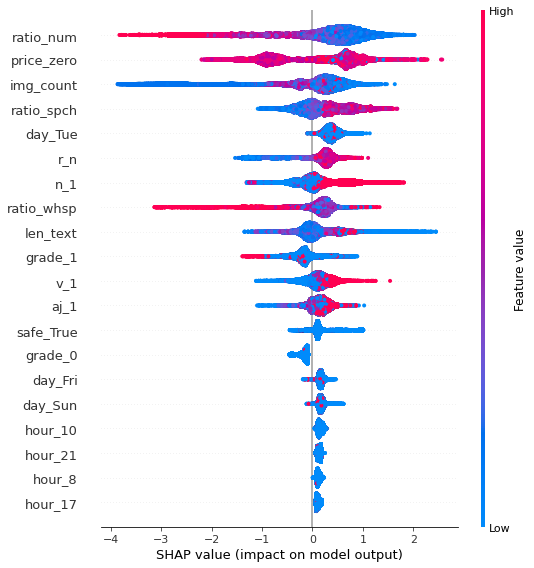

In [21]:
shap.summary_plot(shap_values[0], X)

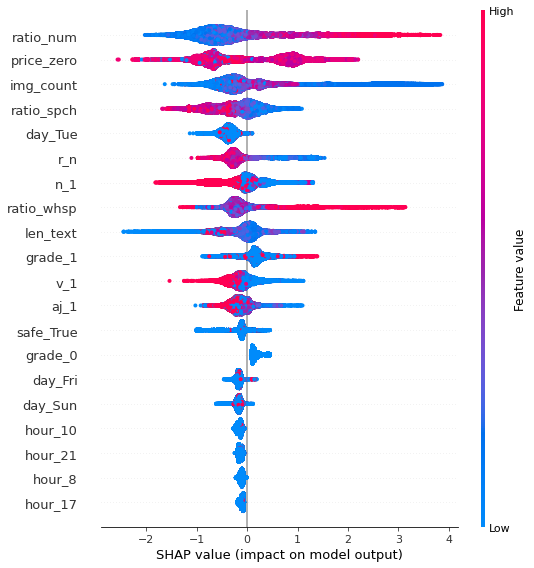

In [23]:
shap.summary_plot(shap_values[1], X)